# 5.1 Inner product and Orthogonality

1. Let  $ \vec{a} = \begin{bmatrix}1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$. 

    a. Find a vector $\vec{w}$ that is in the opposite direction of $\vec{a}$ and has a magnitude of 2.
    
    b. Find two non-parallel vectors $\vec{u}$ and $\vec{v}$ which are both orthogonal to $\vec{a}$



__Solution__

(a) we first find the unit vector of $\vec{a}$ and then multiply it by scaling factor $-2$.

In [1]:
import numpy as np

a = np.array([1,2,3,4])

#length of a
len_a = np.sqrt(np.dot(a,a))

#unit vector of a
e_a = a/len_a

#multyplying by scaling factor -2
w = -2 * e_a

(b) There are many options. Here are a few examples to consider:

$$
\vec{u} = \begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \quad
\vec{v} = \begin{bmatrix} 0\\ 0 \\ -4 \\ 3 \end{bmatrix}, \quad
\vec{w} = \begin{bmatrix} -3\\ 0 \\ 1 \\ 0 \end{bmatrix}.
$$


2. Find two non-parallel vectors $\vec{u}$ and $\vec{v}$, which are both orthogonal to $\vec{a} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ and $\vec{b} = \begin{bmatrix} 2 \\ -1 \\ 0 \end{bmatrix}.$


__Solution:__ It is not possible.

Suppose $\vec{u}$ and $\vec{v}$ exist, and $W = \text{span}(\vec{a}, \vec{b})$. Note that $dim(W) = 2$, and we have that $\vec{u}, \vec{v} \in W^{\perp}$. However, since $\vec{u}$ and $\vec{v}$ are not parallel, they are linearly independent. This means that the $dim(W^{\perp}) \geq 2$, which is a contradiction because, by Theorem 2, we should have $dim(W) + dim(W^{\perp}) = 3$.

3. Let $\vec{v}= \begin{bmatrix}
1\\2\\7
\end{bmatrix}$ and  $\vec{w}= \begin{bmatrix}
1\\-1\\1
\end{bmatrix}.$

   a. Find $\vec{z}= \vec{v}- \displaystyle\left(\frac{\vec{v}\cdot \vec{w}}{\vec{w}\cdot \vec{w}}\right)\vec{w}.$
   
   b. Check that $\vec{z}$ is orthogonal to $\vec{w}.$


__Solution:__

In [2]:
# (a)

v = np.array([1,2,7])

w = np.array([1,-1,1])

##computing z
z = v - (np.dot(v,w)/np.dot(w,w)) * w

print('z = ', z, '\n')

#(b)

##checking z is orthogonal to w

print( 'z.w = ',np.dot(z,w))

z =  [-1.  4.  5.] 

z.w =  0.0


4. If $W = span\left\lbrace\ \begin{bmatrix}
1\\2\\3 \\ 4
\end{bmatrix}\ \right\rbrace$ find a basis for $W^{\perp}$.


__Solution:__ We find a basis for $W$ by looking for all solutions to the linear system:

$$\begin{bmatrix}
1 & 2 &3 & 4
\end{bmatrix}\begin{bmatrix}
a \\b \\ c\\ d
\end{bmatrix}  = \vec{0}.$$

The system of 1 linear equation in 4 unknowns has 3 free variable, $x_2, x_3, x_4$ with $x_1 = -2x_2-3x_3-4x_4.$ So solutions look like:

$$\begin{bmatrix}
-2x_2-3x_3-4x_4 \\ x_2 \\x_3 \\x_4 \end{bmatrix}= x_2 \begin{bmatrix}
-2 \\ 1 \\ 0 \\0 
\end{bmatrix}+ x_3 \begin{bmatrix}
-3 \\ 0 \\ 1 \\0 
\end{bmatrix}+x_4 \begin{bmatrix}
-4 \\ 0 \\ 0 \\1 
\end{bmatrix}.$$

Thus a basis for $W^{\perp}$ is $$\left\lbrace \begin{bmatrix}
-2 \\ 1 \\ 0 \\0 
\end{bmatrix}, \begin{bmatrix}
-3 \\ 0 \\ 1 \\0 
\end{bmatrix}, \begin{bmatrix}
-4 \\ 0 \\ 0 \\1 
\end{bmatrix} \right\rbrace.$$

# 5. 2 Orthogonal Projection

1. Let $\cal{B}=\left\lbrace \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ -1 \end{bmatrix} \right\rbrace$ be a basis of $\mathbb{R}^2.$

   a. Check that this is an orthogonal basis.
   
   b. Find the coordinates of the vector $\begin{bmatrix}
3 \\ 5
\end{bmatrix}$ with respect to the basis $\cal{B}$.

__Solution:__



In [3]:
#(a)

# Representing B as a matrix

B = np.array([[1,1], [1,-1]])

#Cheking the orthogonality of basis elements finding the dot product

np.dot(B[:,0], B[:,1])

0

In [4]:
# (b)

x = np.array([3,5])
#computing the coordinates of x with respect to B
x_B = np.linalg.inv(B) @ x

x_B

array([ 4., -1.])

2. Suppose $\vec{u}_1 = \begin{bmatrix} -7 \\ 1 \\ 4 \end{bmatrix}$, $\vec{u}_2 = \begin{bmatrix} -1 \\ 1 \\ -2 \end{bmatrix}$, $W = \text{span} (\vec{u}_1, \vec{u}_2)$ and $\vec{y} = \begin{bmatrix} 1 \\ 1 \\ 6\end{bmatrix}$.

    a. Show that $\vec{u}_1$ and $\vec{u}_2$ are orthogonal.
    
    b. What is the closest points to $\vec{y}$ in $W$.    
    
    c. Find the distance between $W$ and $\vec{y}$.
    
    d. Convert $\{\vec{u}_1, \vec{u}_2\}$ into an orthonormal basis for $W$.
    
    e. Compute the projection of $\vec{y}$ onto $W$ using the formula given in Theorem 4.
    
    f. Write $\vec{y}$ as sum of two vectors one in $W$ and the other in $W^{\perp}$.
    

In [5]:
# (a) 

u1 = np.array([-7,1,4])

u2 = np.array([-1,1,-2])

# checking orthogonality using the dot product
np.dot(u1,u2)



0

In [6]:
# (b)

y = np.array([1,1,6]) 

# Finding the projection onto W (closest point to W)
Py_W = (np.dot(y,u1)/np.dot(u1,u1))* u1 + (np.dot(y,u2)/np.dot(u2,u2))* u2

Py_W

array([ 0.09090909, -1.72727273,  5.09090909])

In [7]:
# (c)

#compunting the component of y orthogonal to  𝑊
z = y - Py_W
print(z)

# computing the magnitude of z to find the distance
dist = np.sqrt(np.dot(z,z))
dist

[0.90909091 2.72727273 0.90909091]


3.0151134457776365

In [8]:
#(d)

#normalizing u1
e1 = u1/ np.sqrt(np.dot(u1,u1))
print('e1 = ', e1, '\n')


#normalizing u2
e2 = u2/ np.sqrt(np.dot(u2,u2))
print('e2 = ', e2, '\n')

e1 =  [-0.86164044  0.12309149  0.49236596] 

e2 =  [-0.40824829  0.40824829 -0.81649658] 



In [9]:
#(e)

# Finding the matrix whose columns are e1,e2

U = np.array([e1,e2]).T

# computing the projection using (*) formula in Theorem 4
U @ U.T @ y 



array([ 0.09090909, -1.72727273,  5.09090909])

(f) $$\vec{y} = \text{proj}^{\vec{y}}_{W} + \vec{z}$$

Or

$$
\begin{bmatrix} 1 \\ 1 \\ 6\end{bmatrix} = \begin{bmatrix} 0.90909091 \\ -1.72727273 \\ 5.09090909\end{bmatrix}  + \begin{bmatrix} 0.09090909 \\ 2.72727273 \\ 0.90909091 \end{bmatrix}
$$

# 5. 3 The Gram–Schmidt Process


1. Let $\vec{x}_1 = \begin{bmatrix} 3 \\ 1 \\ -1\\ 3 \end{bmatrix}$, $\vec{x}_2 = \begin{bmatrix} -5 \\ 1 \\ 5\\ -7 \end{bmatrix}$, $\vec{x}_3 = \begin{bmatrix} 1\\ 1 \\ -2\\ 8 \end{bmatrix}$, and $W = \text{span}(\{\vec{x}_1, \vec{x}_2, \vec{x}_3\})$. Construct an orthonormal basis for $W$.

__Solution:__

In [10]:

x1 = np.array([3,1,-1,3])

x2 = np.array([-5,1,5,-7])

x3 = np.array([1,1,-2,8])

v1 = x1
# projection of x2 onto x1

proj_x2_v1 = (np.dot(x2,v1)/ np.dot(v1,v1))* v1
print( "The projection of x2 onto x1 is ", proj_x2_v1, '\n') 

v2 = x2 - proj_x2_v1

print("The component of x1 orthogonal to W1 is", v2,'\n' )

# projection of x3 onto W2

proj_x3_W2 = (np.dot(x3,v1)/ np.dot(v1,v1))* v1  +  (np.dot(x3,v2)/ np.dot(v2,v2))* v2

print( "The projection of x3 onto W2 is ", proj_x3_W2, '\n') 

# component of y orthogonal to p
v3 = x3 - proj_x3_W2

print("The component of x3 orthogonal to W2 is", v3 )

The projection of x2 onto x1 is  [-6. -2.  2. -6.] 

The component of x1 orthogonal to W1 is [ 1.  3.  3. -1.] 

The projection of x3 onto W2 is  [ 4.  0. -3.  5.] 

The component of x3 orthogonal to W2 is [-3.  1.  1.  3.]


In [11]:
# The unit vector of v1
e1 = v1 / np.sqrt(np.dot(v1,v1))

# The unit vector of v1
e2 = v2 / np.sqrt(np.dot(v2,v2))

# The unit vector of v1
e3 = v3 / np.sqrt(np.dot(v3,v3))

print("e1 = ", e1)
print("e2 = ", e2)
print("e3 = ", e3)

e1 =  [ 0.67082039  0.2236068  -0.2236068   0.67082039]
e2 =  [ 0.2236068   0.67082039  0.67082039 -0.2236068 ]
e3 =  [-0.67082039  0.2236068   0.2236068   0.67082039]


2. Let $A$ be a matrix whose columns are $\vec{x}_1$, $\vec{x}_2$, $\vec{x}_3$ from Exercise 1: $A = \begin{bmatrix} 3 & -5 & 1 \\  1 & 1 & 1 \\ -1 & 5 & -2 \\ 3 & -7 & 8\end{bmatrix}$. Find a QR decomposition for $A$.

__Solution:__

In [12]:
# setup A
A = np.transpose([x1, x2, x3])
print('A = ', A, '\n')

# setup Q
Q = np.transpose([e1, e2, e3])
print('Q = ', Q, '\n')

# Compute R= Q^T*A
R = np.transpose(Q) @ A
print('R = ', R)

A =  [[ 3 -5  1]
 [ 1  1  1]
 [-1  5 -2]
 [ 3 -7  8]] 

Q =  [[ 0.67082039  0.2236068  -0.67082039]
 [ 0.2236068   0.67082039  0.2236068 ]
 [-0.2236068   0.67082039  0.2236068 ]
 [ 0.67082039 -0.2236068   0.67082039]] 

R =  [[ 4.47213595 -8.94427191  6.70820393]
 [ 0.          4.47213595 -2.23606798]
 [ 0.          0.          4.47213595]]


Let's use `np.linalg.qr` to check our solution:

In [13]:
Q, R = np.linalg.qr(A)
print('Q = ', Q, '\n')
print('R = ', R)

Q =  [[-0.67082039 -0.2236068   0.67082039]
 [-0.2236068  -0.67082039 -0.2236068 ]
 [ 0.2236068  -0.67082039 -0.2236068 ]
 [-0.67082039  0.2236068  -0.67082039]] 

R =  [[-4.47213595  8.94427191 -6.70820393]
 [ 0.         -4.47213595  2.23606798]
 [ 0.          0.         -4.47213595]]


3. Let $A = QR$, where $Q$ is an $m \times n$ matrix with orthogonal columns, and $R$ is an $n \times n$ matrix. Show that if the columns of $A$ are linearly dependent, then $R$ cannot be invertible.


__Solution:__

Since the columns of matrix $A$ are linearly dependent, by the invertible matrix theorem, there exists a nonzero vector $\vec{x}$ such that $A\vec{x} = 0$. Replacing $A$ with its QR factorization, we have $QR\vec{x} = 0$. As $Q$ is invertible, we can apply $Q^{-1}$ to both sides, resulting in $R\vec{x} = 0$. Since $\vec{x}$ is nonzero, $R\vec{x} = 0$ has a nontrivial solution. Therefore, by the invertible matrix theorem again, $R$ is not invertible.

# 5.4 Least-Squares Problems

1. Let $A = \begin{bmatrix} 1 & -3 & -3 \\  1 & 5 & 1 \\ 1 & 7 & 2\end{bmatrix}$ and $\vec{b} = \begin{bmatrix} 5 \\ -3 \\ -5 \end{bmatrix}$.

    a.  Find a least-squares solution of $A\vec{x} = \vec{b}$.
    
    b. Compute the associated least-squares error $\| \vec{b} - A\hat{x}\|$.

In [41]:
# (a)

#setup

A = np.array([[1,-3,-3], [1,5,1],[1,7,2]])

b = np.array([[5,-3,-5]]).T

# QR factorization
Q, R = np.linalg.qr(A)

#computing x_hat
x_hat = np.linalg.inv(R) @ Q.T @ b
x_hat

array([[-3.],
       [ 0.],
       [-3.]])

In [42]:
#(b)

#compute the least square error
z = b - A @ x_hat
np.linalg.norm(z)


5.0990195135927845

2. Describe all least-squares solutions of the system

$$
\begin{align*}
    x + y &= 2 \\ 
    x + y &= 4 \\ 
\end{align*}
$$

__Solution:__

Let $A = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$, and $\vec{b} = \begin{bmatrix} 2 & 4 \end{bmatrix}$. We find the normal equation of $A\vec{x} = \vec{b}$

$$
A^TA\vec{x} = A^T\vec{b}
$$

In [71]:
A = np.array([[1,1],[1,1]])

b = np.array([[2,4]]).T

#Compute A^TA

ATA = A.T @ A

print('ATA = \n', ATA,'\n')

#compute A^Tb

ATb = A.T @ b
print('ATb = \n', ATb)



ATA = 
 [[2 2]
 [2 2]] 

ATb = 
 [[6]
 [6]]


Thus, the normal equation is 

$$
 \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix}  \begin{bmatrix} x \\ y \end{bmatrix} =  \begin{bmatrix} 6 \\ 6 \end{bmatrix}
$$

whose solution is the set of all $(x,y)$ such that $x+y = 3$. The solutions form a line midway between $x+y = 2$ and $x+y = 4$. 

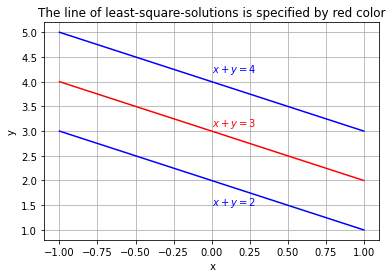

In [72]:
import matplotlib.pyplot as plt

# Data for plotting

x = range(-1, 2)
y1 = [ 2 - k for k in x]
y2 = [ 3 - k for k in x]
y3 = [ 4 - k for k in x]

fig, ax = plt.subplots()

# Specify the length of each axis
#ax.set_xlim(-5,5)
#ax.set_ylim(-5,5)

#Plot x and y1 using blue color
ax.plot(x, y1, color = 'b')
ax.text(0,1.5,'$x + y = 2$', color = 'b')

#Plot x and y2 using red color
ax.plot(x, y2, color = 'r')
ax.text(0,3.1,'$x + y = 3$', color = 'r')

#Plot x and y3 using blue color
ax.plot(x, y3, color = 'b')
ax.text(0,4.2,'$x + y = 4$', color = 'b')


# Add labels and a title to the graph
ax.set(xlabel=' x', ylabel='y', title = 'The line of least-square-solutions is specified by red color')
ax.grid()

plt.show()